In [1]:
from IPython.core.display import display, HTML
from warnings import filterwarnings
display(HTML("<style>.container { width:100% !important; }</style>"))
filterwarnings(action='ignore')

In [2]:
%matplotlib inline
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from evalys import visu
from evalys.jobset import JobSet

In [4]:
input_location = 'KTH-1000-workloads'

In [5]:
schedule_files = []
jobs_files = []
for file in os.listdir('../output/' + input_location):
    if file.endswith('_schedule.csv'):
        schedule_files.append(file)
    elif file.endswith('_jobs.csv'):
        jobs_files.append(file)

schedule_files = [os.path.join('../output', input_location, str(file)) for file in sorted(schedule_files)]
jobs_files = [os.path.join('../output', input_location, str(file)) for file in sorted(jobs_files)]

In [6]:
metrics = pd.DataFrame()
for file in schedule_files:
    workload_name, schedule_name, _ = os.path.basename(file).split('_')
    print(workload_name, schedule_name)
    df = pd.read_csv(file)
    df['workload'] = workload_name
    df['schedule'] = schedule_name
    df = df.set_index('schedule')
    metrics = metrics.append(df)

workload-1 backfill-1
workload-1 backfill-2
workload-1 backfill-3
workload-1 backfill-4
workload-1 backfill-5
workload-1 backfill-6
workload-1 backfill-7
workload-1 backfill-8
workload-1 fcfs
workload-1 filler
workload-2 backfill-1
workload-2 backfill-2
workload-2 backfill-3
workload-2 backfill-4
workload-2 backfill-5
workload-2 backfill-6
workload-2 backfill-7
workload-2 backfill-8
workload-2 fcfs
workload-2 filler
workload-3 backfill-1
workload-3 backfill-2
workload-3 backfill-3
workload-3 backfill-4
workload-3 backfill-5
workload-3 backfill-6
workload-3 backfill-7
workload-3 backfill-8
workload-3 fcfs
workload-3 filler
workload-4 backfill-1
workload-4 backfill-2
workload-4 backfill-3
workload-4 backfill-4
workload-4 backfill-5
workload-4 backfill-6
workload-4 backfill-7
workload-4 backfill-8
workload-4 fcfs
workload-4 filler
workload-5 backfill-1
workload-5 backfill-2
workload-5 backfill-3
workload-5 backfill-4
workload-5 backfill-5
workload-5 backfill-6
workload-5 backfill-7
worklo

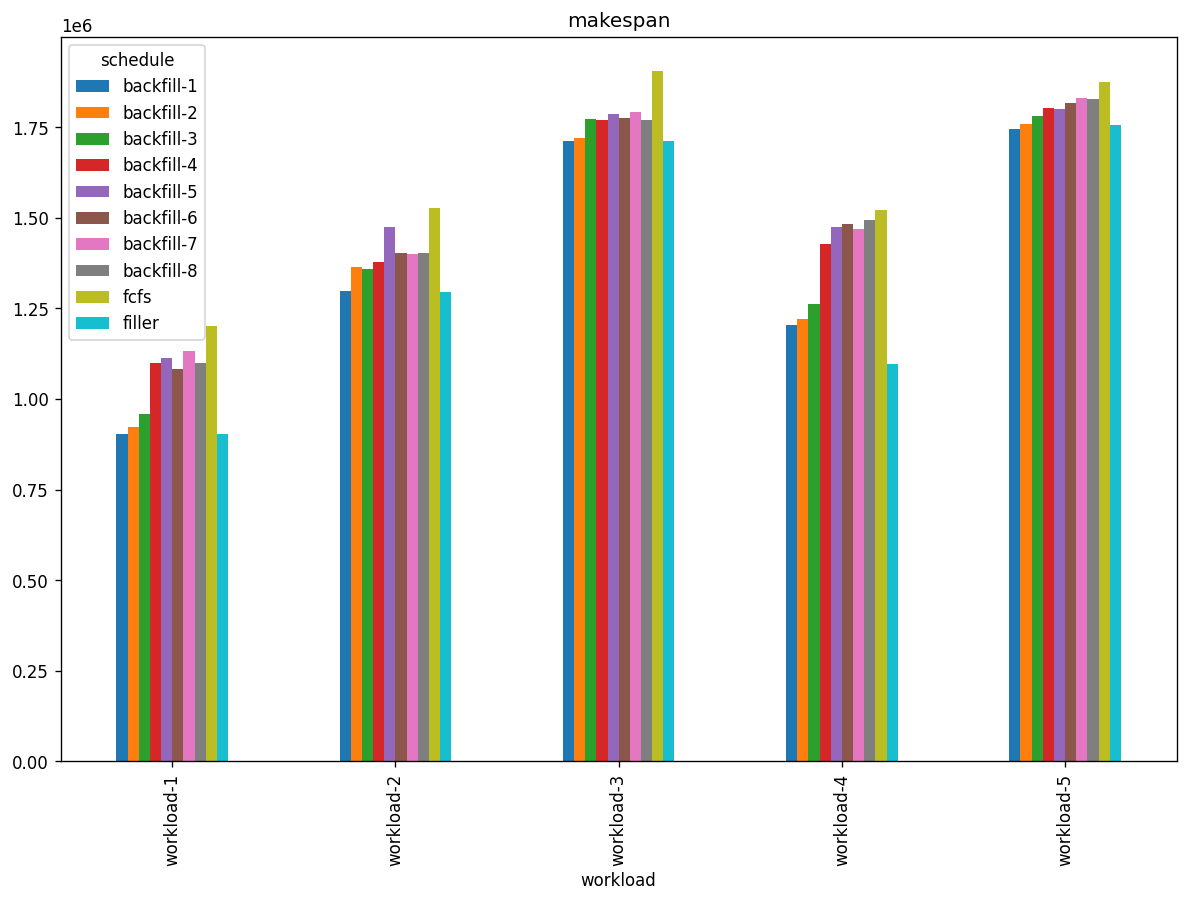

In [103]:
matplotlib.rcParams['figure.figsize'] = 12,8
matplotlib.rcParams['figure.dpi']= 120
metrics.groupby(['workload', 'schedule'])['makespan'].mean().unstack('schedule').plot.bar(title='makespan', stacked=False)

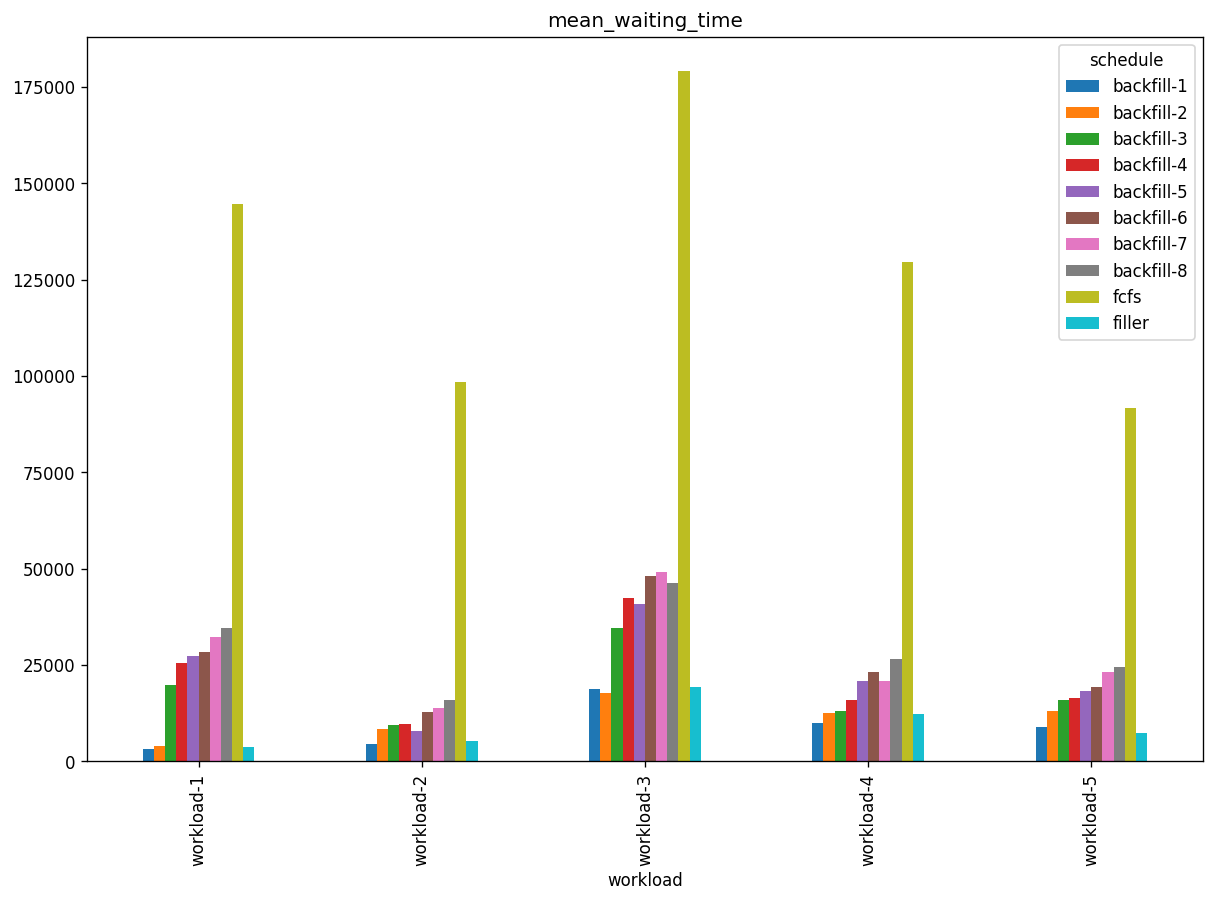

In [104]:
matplotlib.rcParams['figure.figsize'] = 12,8
matplotlib.rcParams['figure.dpi']= 120
metrics.groupby(['workload', 'schedule'])['mean_waiting_time'].mean().unstack('schedule').plot.bar(title='mean_waiting_time', stacked=False)

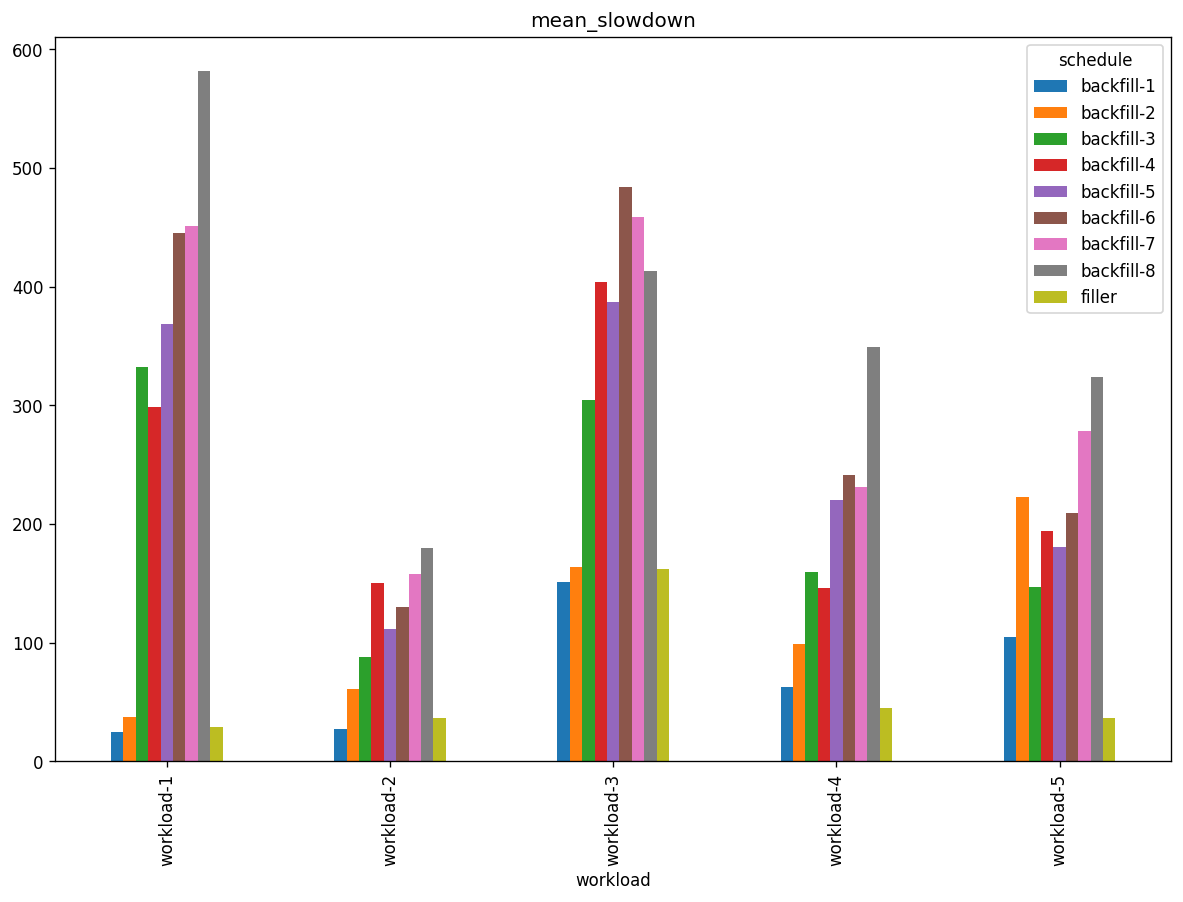

In [105]:
matplotlib.rcParams['figure.figsize'] = 12,8
matplotlib.rcParams['figure.dpi']= 120
metrics.drop('fcfs').groupby(['workload', 'schedule'])['mean_slowdown'].mean().unstack('schedule').plot.bar(title='mean_slowdown', stacked=False)

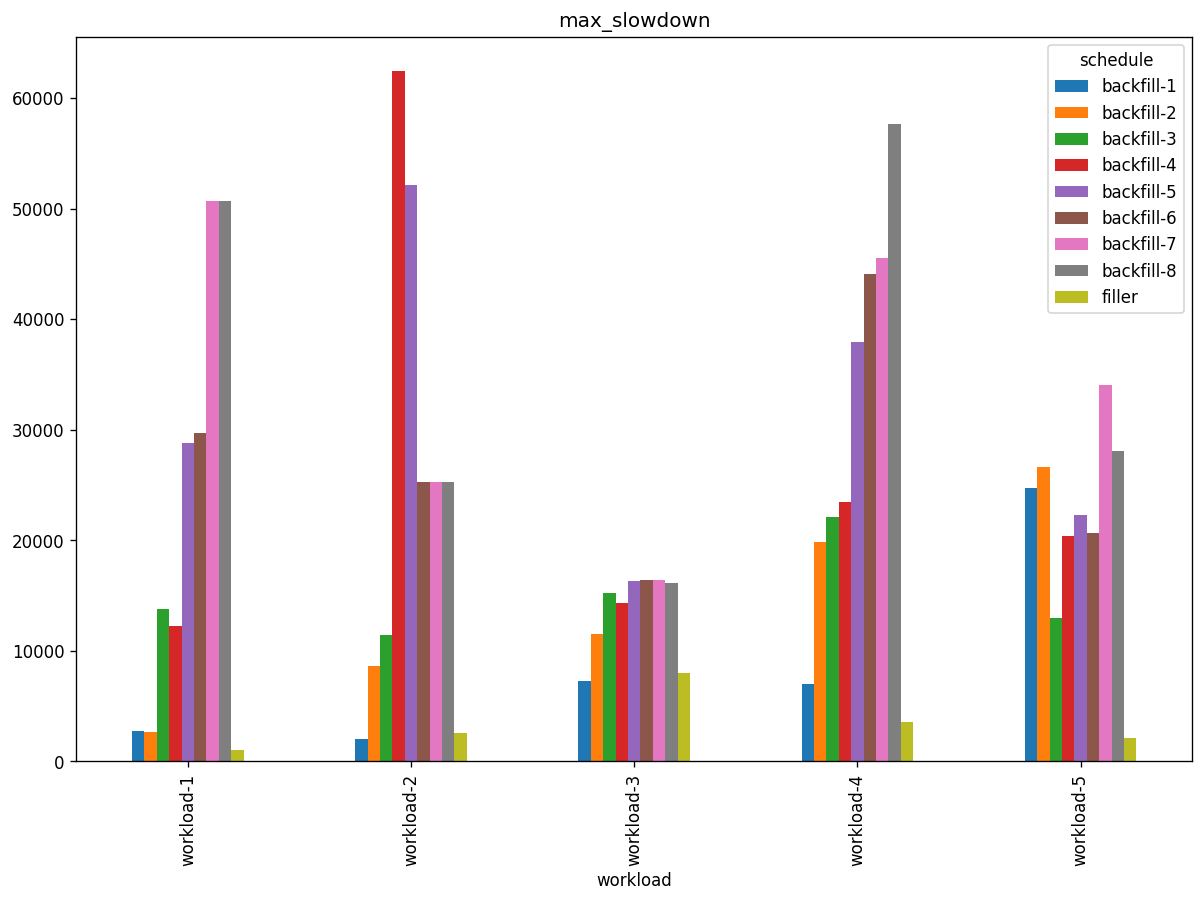

In [106]:
matplotlib.rcParams['figure.figsize'] = 12,8
matplotlib.rcParams['figure.dpi']= 120
metrics.drop('fcfs').groupby(['workload', 'schedule'])['max_slowdown'].mean().unstack('schedule').plot.bar(title='max_slowdown', stacked=False)

In [111]:
jobsets = {}
for file in jobs_files:
    workload_name, schedule_name, _ = os.path.basename(file).split('_')
    print(workload_name, schedule_name)
    jobsets[(workload_name, schedule_name)] = JobSet.from_csv(file)

workload-1 backfill-1
workload-1 backfill-2
workload-1 backfill-3
workload-1 backfill-4
workload-1 backfill-5
workload-1 backfill-6
workload-1 backfill-7
workload-1 backfill-8
workload-1 fcfs
workload-1 filler
workload-2 backfill-1
workload-2 backfill-2
workload-2 backfill-3
workload-2 backfill-4
workload-2 backfill-5
workload-2 backfill-6
workload-2 backfill-7
workload-2 backfill-8
workload-2 fcfs
workload-2 filler
workload-3 backfill-1
workload-3 backfill-2
workload-3 backfill-3
workload-3 backfill-4
workload-3 backfill-5
workload-3 backfill-6
workload-3 backfill-7
workload-3 backfill-8
workload-3 fcfs
workload-3 filler
workload-4 backfill-1
workload-4 backfill-2
workload-4 backfill-3
workload-4 backfill-4
workload-4 backfill-5
workload-4 backfill-6
workload-4 backfill-7
workload-4 backfill-8
workload-4 fcfs
workload-4 filler
workload-5 backfill-1
workload-5 backfill-2
workload-5 backfill-3
workload-5 backfill-4
workload-5 backfill-5
workload-5 backfill-6
workload-5 backfill-7
worklo